['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


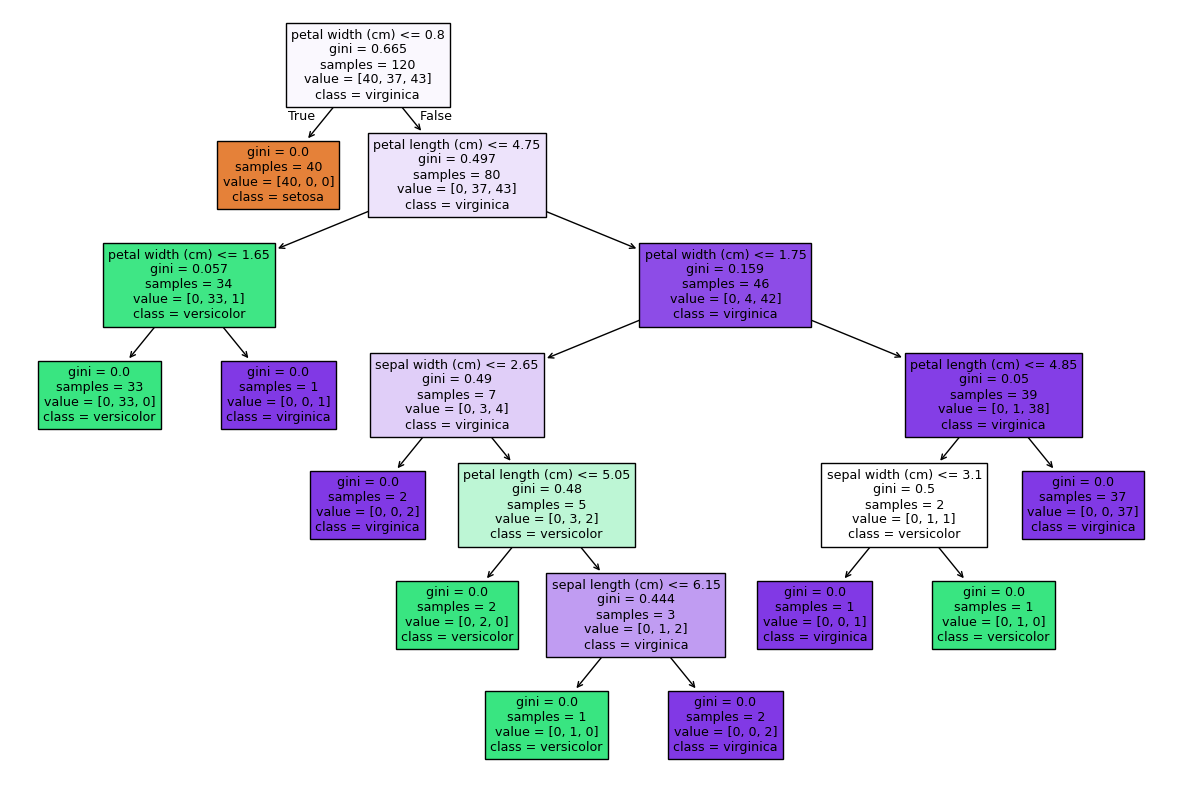

Confusion Matrix:
 [[10  0  0]
 [ 0 12  1]
 [ 0  0  7]]
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.92      0.96        13
   virginica       0.88      1.00      0.93         7

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



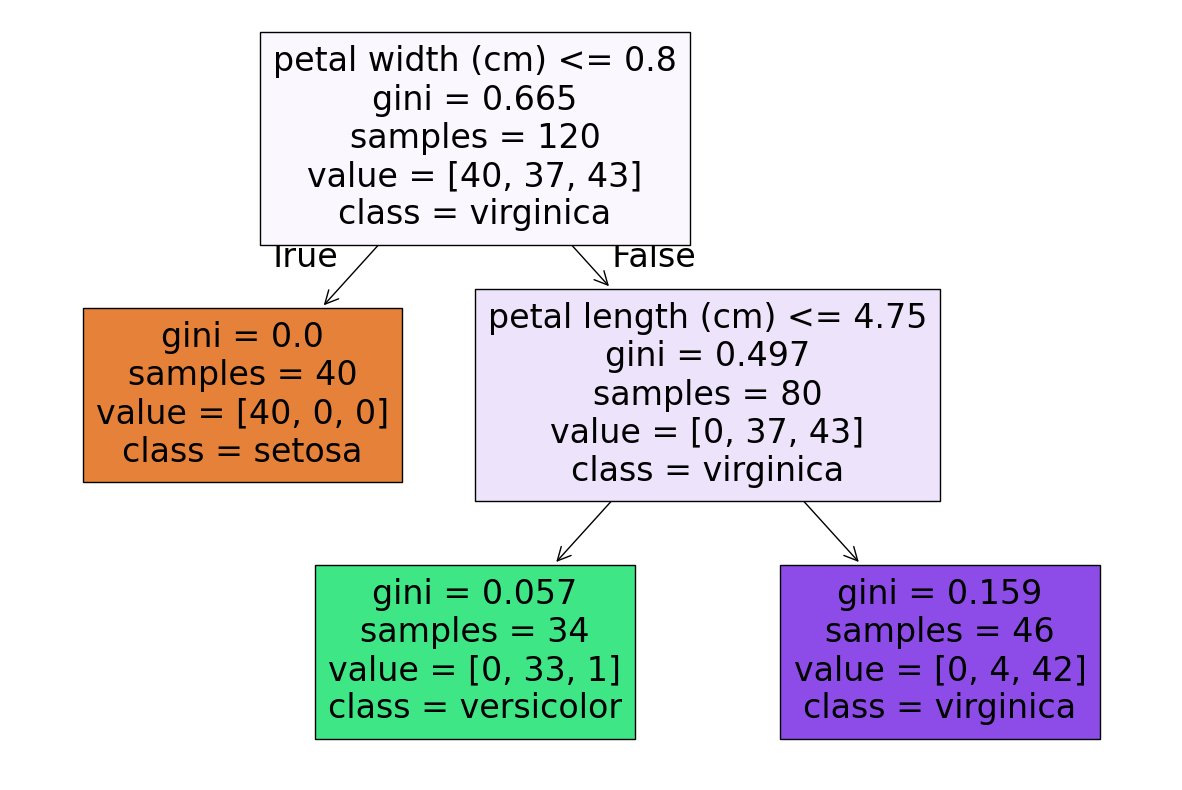

Confusion Matrix:
 [[10  0  0]
 [ 0 11  2]
 [ 0  0  7]]
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.85      0.92        13
   virginica       0.78      1.00      0.88         7

    accuracy                           0.93        30
   macro avg       0.93      0.95      0.93        30
weighted avg       0.95      0.93      0.93        30



In [ ]:
# 🔹 Step 1: Import Required Libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, classification_report

# We need some basic libraries to handle data, plot charts, and build the model.

# 🔹 Step 2: Load the Iris Dataset
# •	load_iris() gives a small dataset about Iris flowers.
# •	It has 4 input features and 3 types (classes) of flowers: setosa, versicolor, and virginica.
iris = load_iris()
iris
# {'data': array([[5.1, 3.5, 1.4, 0.2],
#         [4.9, 3. , 1.4, 0.2]])}

# You can explore the data:
print(iris.feature_names)
print(iris.target_names)

# ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
# ['setosa' 'versicolor' 'virginica']

# 🔹 Step 3: Prepare the Dataset
# •	Input features (X): Sepal and Petal dimensions
# •	Output (y): Class label (0, 1, or 2)
# Convert to DataFrame
X = pd.DataFrame(iris.data, columns=iris.feature_names)
X.head()
# | Index | Sepal Length (cm) | Sepal Width (cm) | Petal Length (cm) | Petal Width (cm) |
# | ----- | ----------------- | ---------------- | ----------------- | ---------------- |
# | 0     | 5.1               | 3.5              | 1.4               | 0.2              |
# | 1     | 4.9               | 3.0              | 1.4               | 0.2              |
# | 2     | 4.7               | 3.2              | 1.3               | 0.2              |
# | 3     | 4.6               | 3.1              | 1.5               | 0.2              |
# | 4     | 5.0               | 3.6              | 1.4               | 0.2              |
# Target labels
y = iris.target

# 🔹 Step 4: Train-Test Split
# •	Split the dataset into training and testing parts.
# •	80% data for training, 20% for testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# 🔹 Step 5: Build Decision Tree Classifier
# •	By default, criterion='gini' is used.
# •	No scaling or normalization is needed for decision trees.
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)

# 🔹 Step 6: Visualize the Decision Tree
# •	Helps us understand how the model splits data based on feature conditions.
# •	plot_tree() shows each decision node and leaf node.
plt.figure(figsize=(15,10))
plot_tree(tree_clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()

# Lighter color = more mixed classes (impure)
# Darker color = more pure (mostly one class)

# feature_names=iris.feature_names
# This tells the plot to label each node split using the actual feature names, like:
# 'sepal length (cm)', 'petal width (cm)', etc.

# class_names=iris.target_names
# Maps class numbers (0, 1, 2) to the actual flower names:
# 'setosa', 'versicolor', 'virginica'
# Helps you understand what class each leaf node is predicting.

# 🧠 Understanding the Tree
# •	Gini = 0 → Pure node (all samples of one class)
# •	Gini = 0.5 → Mixed node (uncertain split)
# •	Each split is done to increase purity by reducing Gini or Entropy.

# 🔹 Step 7: Prediction and Evaluation
# •	Use the trained model to predict test data.
# •	Evaluate using confusion matrix and classification report.
y_pred = tree_clf.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Classification Report
cr = classification_report(y_test, y_pred, target_names=iris.target_names)
print("Classification Report:\n", cr)

# Confusion Matrix:
#  [[10  0  0]
#  [ 0 13  0]
#  [ 0  0  7]]
# Classification Report:
#                precision    recall  f1-score   support

#       setosa       1.00      1.00      1.00        10
#   versicolor       1.00      1.00      1.00        13
#    virginica       1.00      1.00      1.00         7

#     accuracy                           1.00        30
#    macro avg       1.00      1.00      1.00        30
# weighted avg       1.00      1.00      1.00        30

# 🔹 Step 8: Post-Pruning Example
# •	Post-pruning = Build full tree → Then cut off unnecessary splits to prevent overfitting.
# •	We can do this by setting max_depth=2 (manually limiting tree depth).
tree_clf_pruned = DecisionTreeClassifier(max_depth=2)
tree_clf_pruned.fit(X_train, y_train)

plt.figure(figsize=(15,10))
plot_tree(tree_clf_pruned, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()
# ➡️ This pruned tree is simpler and prevents the model from memorizing too much (i.e., overfitting).

# 🔹 Step 9: Evaluate the Pruned Model
# Check if pruning helped:
y_pred_pruned = tree_clf_pruned.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_pruned))
print("Classification Report:\n", classification_report(y_test, y_pred_pruned, target_names=iris.target_names))

# Confusion Matrix:
#  [[10  0  0]
#  [ 0 11  2]
#  [ 0  0  7]]
# Classification Report:
#                precision    recall  f1-score   support

#       setosa       1.00      1.00      1.00        10
#   versicolor       1.00      0.85      0.92        13
#    virginica       0.78      1.00      0.88         7

#     accuracy                           0.93        30
#    macro avg       0.93      0.95      0.93        30
# weighted avg       0.95      0.93      0.93        30



